In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spqd
from time import time
%matplotlib inline

In [36]:
def simpson_method(a,b,N,f):
    Nint = int(N)
    Tint = 2*Nint
    xvals = np.linspace(a,b,Tint+1)
    fvals = f(xvals)
    dx = (b-a)/(2.*N)
    return dx/3.*(fvals[0] + fvals[Tint] + 2.*np.sum(fvals[2:Tint-1:2]) + 4.*np.sum(fvals[1:Tint:2])) 

In [2]:
def adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol):    
    d = (a+c)/2.
    e = (b+c)/2.
    fd = f(d)
    fe = f(e)
    dx3 = (d-a)/3.
    Aac = dx3*(fa+4.*fd+fc)
    Acb = dx3*(fc+4.*fe+fb)
    if np.abs(Aab-(Aac+Acb))<=tol: 
        return (16./15.*(Aac+Acb)-Aab/15.)
    else:  
        F1 = adap_quad_comp(f,a,c,d,fa,fc,fd,Aac,tol)
        F2 = adap_quad_comp(f,c,b,e,fc,fb,fe,Acb,tol)
        return F1 + F2
    
def adap_quad(f,a,b,tol):
    c = (a+b)/2.
    fa = f(a)
    fb = f(b)
    fc = f(c)
    dx3 = (c-a)/3.
    Aab = dx3*(fa+4.*fc+fb)
    ival = adap_quad_comp(f,a,b,c,fa,fb,fc,Aab,tol)    
    return ival

**Problem 1**: (5 pts) Use the adaptive quadrature algorithm to evaluate 

$$
\int_{-1}^{2} \frac{dt}{\sin\left(\sqrt{|t|} \right)}.
$$

State how you arrive at your result i.e. what tolerances do you choose and what degree of accuracy can you argue that they provide you?  Why do you not encounter divide-by-zero difficulties at $t=0$?

**Problem 2**: (10 pts) Definite integrals sometimes have the property that the integrand becomes infinite at one or both of the endpoints, but the integral itself is finite.  In other words, $\lim_{x\rightarrow a}|f(x)|=\infty$ or $\lim_{x\rightarrow a}|f(x)|=\infty$, but 

$$
\int_{a}^{b}f(x)dx 
$$

exists and is finite.  

* (7 pts) Modify the adaptive quadrature algorithm so that if an infinite value of $f(a)$ or $f(b)$ is detected, an appropriate warning message is displayed and $f(x)$ is reevaluated at a point very near to a or b.  

* (3 pts) Find an example that triggers the warning, but has a finite integral.  

**Problem 3**: (5 pts) Write a recursive program which computes $\begin{pmatrix} n \\ k \end{pmatrix}$ where for $0\leq k \leq n$

$$
\begin{pmatrix} n \\ k \end{pmatrix} = \frac{n!}{k!(n-k)!},
$$

using the formula 

$$
\begin{pmatrix} n \\ k \end{pmatrix} = \begin{pmatrix} n-1 \\ k \end{pmatrix} + \begin{pmatrix} n-1 \\ k-1 \end{pmatrix}
$$

Provide two examples which show your implementation is correct.  

**Problem 4**: (10 pts) The Hermite polynomials $H_{n}(x)$ are such that $H_{0}(x)=1$, $H_{1}(x)=2x$, and for $n\geq2$, $H_{n}(x)$ satisfies the recurrence relationship

$$
H_{n}(x) = 2xH_{n-1}(x) -2(n-1)H_{n-2}(x), ~ n\geq 2. 
$$

* (6 pts) Write a recursive program to find any Hermite polynomial $H_{n}(x)$.
* (4 pts) Generate a plot of the first six Hermite polyonmials on the interval $-2\leq x \leq 2$.  Your figure should be labeled, have a legend, and different colors should be used to distinguish the different Hermite polynmials in the plot.  

**Problem 5**: (10 pts) As we briefly discussed in class, when using the adaptive quadrature algorithm, it will struggle when the fourth derivative of the function $f(x)$ varies too much over the interval of integration.  Using the example $f(x)=\sin(x^{2})$ and the error analysis code below, produce plots and provide the necessary explanation which illustrates this issue.  You will also probably want to compute the fourth derivative of the given function in order to illustrate your point.  

It is said that a reason to use adaptive quadrature is that setting the tolerance effectively sets the error of the method?  Do your results support this claim?  Why or why not?

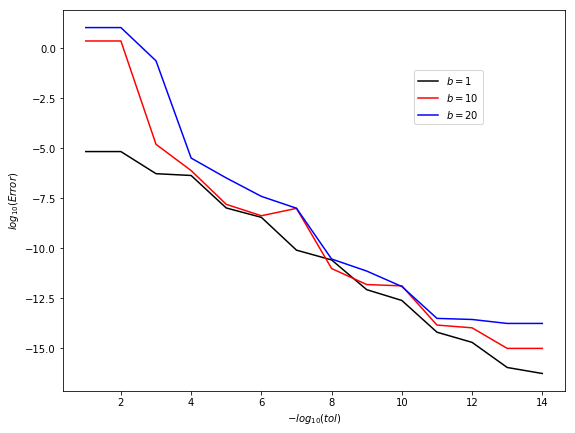

In [9]:
snp2 = lambda x: np.sin(x**2.)

def adap_error_test(a,b,f,tolvals):
    tval = spqd.quad(lambda x: f(x), a, b)
    Evals = np.zeros(tolvals.size)
    for jj in xrange(0,tolvals.size):
        Evals[jj] = np.log10(np.abs(tval[0] - adap_quad(f,a,b,tolvals[jj])))
    return Evals

ppows = np.arange(1,15)
tolvals = 10.**(-ppows)
xvals = -np.log10(tolvals)

Evals1 = adap_error_test(0.,1.,snp2,tolvals)
Evals2 = adap_error_test(0.,10.,snp2,tolvals)
Evals3 = adap_error_test(0.,20.,snp2,tolvals)

plt.plot(xvals,Evals1,ls='-',color='k',label='$b=1$')
plt.plot(xvals,Evals2,ls='-',color='r',label='$b=10$')
plt.plot(xvals,Evals3,ls='-',color='b',label='$b=20$')
plt.legend(loc=(.7,.7))
plt.xlabel('$-log_{10}(tol)$')
plt.ylabel('$log_{10}(Error)$')    
fig=plt.gcf() # get current figure
fig.set_size_inches(9,7) # optional size